# Transformation properties of the likelihood and posterior

In the notebooks [*How do distributions transform under a change of variables?*
](./change-of-variables) and *[Change of variables with autodiff](./one-over-x-flow)* we saw how a distribution $p_X$ for a random variable $X$ transforms under a change of variables $X \to Y$. In particular we found that that the transformation involves a Jacobian factor. 

\begin{equation}
p_Y(Y=y) = p_X(x) \,/ \,\left| \, {dy}/{dx}\, \right | 
\end{equation}

If we were working with a family of distributions $p_X(X | \theta)$, where $\theta$ is the parameter that is used to index the family of distributions we would have the same thing.

\begin{equation}
p_Y(Y=y \mid \theta) = p_X(x \mid \theta) \,/ \,\left| \, {dy}/{dx}\, \right | 
\end{equation}

In [*Transformation of likelihood with change of random variable*](./likelihood-change-obs) we saw how this Jacobian factor leads to a multipliciative scaling of the likelihood function (or a constant shift of the log-likelihood function), but that likelihood-ratios are invariant to a change of variables $X \to Y$ (because the Jacobian factor cancels). 

## How does the likelihood transform to reparameterization?

But how does the likelihood $L(\theta) := p(X=x | \theta)$ transform when we keep the random variable unchanged, but instead reparameterize the parameters used to index the family of distributions, eg. $\theta \to \phi$? As we will see, **the likelihood is invariant to reparameterization**, which is a very important property. It also underscores how the likelihood is not a probability density in $\theta$.

```{note}
This notebook is intended to demonstrate explicitly the transformation properties of the likelihood function, posterior, maximum likelihood estimate(MLE), and maximum a posterior (MAP) estimate. 
```

We will start with a family of pdfs $p(X \mid \sigma)$, where $X$ is a continuous random variable and $\sigma$ is the parameter used to index or parametrize the family.  In practice, we will use a normal distribution with mean 0 and $\sigma$ will be the standard deviation. 

We will then consider a reparametrization of the same family of pdfs, but instead of using $\sigma$ we will use $V=\sigma^2$ (eg. the variance).


We will consider a small data set $\{x_i\}_{i=1}^{15} \sim p(X \mid \sigma=\sigma_{true})$. 

We will plot the distribution for two values of $\sigma$: $\sigma_{true}$ and $\sigma_{other}$.

We will then look at the likelihood for the individual data points $p(x_i | \sigma)$ and since the data are i.i.d. the total likelihood is $L(\sigma) = \prod_i p(x_i | \sigma)$. 

We will then look at the reparametrized likelihood for the individual data points $p(x_i | V)$ and since the data are i.i.d. the total likelihood is $L^\prime(V) = \prod_i p^\prime(x_i | V)$. 

We will then plot the original and reparametrized likelihoods in a particular way to demonstrate that the value of the likelihood is invariant to reprametrization: eg.  $L(\sigma) = L^\prime(V(\sigma))$

### Check explicitly

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'font.size': 15})
#rcParams.update({'font.size': 18,'text.usetex': True})
rcParams['figure.figsize'] = 12,6

We start with a family of pdfs $p(X \mid \sigma)$, where $X$ is a continuous random variable and $\sigma$ is the parameter used to index or parametrize the family.  In practice, we will use a normal distribution with mean 0 and $\sigma$ will be the standard deviation. 

In [2]:
def my_family_of_pdfs(x, sigma):
    #return 1./np.sqrt(2.*np.pi)/sigma * np.exp( -(x-mu)**2/2/sigma**2 )
    return norm.pdf(x,scale=sigma)

We will then consider a reparametrization of the same family of pdfs, but instead of using $\sigma$ we will use $V=\sigma^2$ (eg. the variance).

In [3]:
def sigma_to_V(sigma):
    return sigma*sigma

def V_to_sigma(V):
    return np.sqrt(V)

In [4]:
def my_reparametrized_family_of_pdfs(x, variance):
    return my_family_of_pdfs(x,V_to_sigma(variance))

We will consider a small data set $\{x_i\}_{i=1}^{15} \sim p(X \mid \sigma=\sigma_{true})$. 

In [5]:
true_sigma=1.3
true_V = sigma_to_V(true_sigma)

In [6]:
# Generate some synthetic data
data = norm.rvs(scale=true_sigma, size=15)
data

array([ 0.93103086,  0.25461656,  0.01924056,  0.12333217,  0.88722697,
       -1.17641472,  0.44889527, -1.6312956 ,  0.11686814,  0.12861621,
        1.63503248, -0.2726336 ,  1.43866873, -1.53739523, -2.56144692])

We will plot the distribution for two values of $\sigma$: $\sigma_{true}$ and $\sigma_{other}$.

We will then look at the likelihood for the individual data points $p(x_i | \sigma)$ and since the data are i.i.d. the total likelihood is $L(\sigma) = \prod_i p(x_i | \sigma)$. 

In [7]:
likelihood_i = my_family_of_pdfs(data, true_sigma)
total_likelihood = np.prod(likelihood_i)
print('the total likeihood for this data set when sigma={0} is {1}'.format(true_sigma, total_likelihood))
print('-2 log L(sigma={0}) = {1}'.format(true_sigma, -2*np.log(total_likelihood)))

the total likeihood for this data set when sigma=1.3 is 5.840111269517725e-11
-2 log L(sigma=1.3) = 47.12737234655253


In [8]:
other_sigma = 0.7
other_V = sigma_to_V(other_sigma)

other_likelihood_i = my_family_of_pdfs(data, other_sigma)
other_total_likelihood = np.prod(other_likelihood_i)
print('the total likeihood for this data set when sigma={0} is {1}'.format(other_sigma, other_total_likelihood))
print('-2 log L(sigma={0}) = {1}'.format(other_sigma, -2*np.log(other_total_likelihood)))

the total likeihood for this data set when sigma=0.7 is 3.8317371491953943e-13
-2 log L(sigma=0.7) = 57.1805758896008


In [9]:
# This isn't data, just a scan over x-values for plotting
x_for_plot = np.linspace(-5,5, 100)

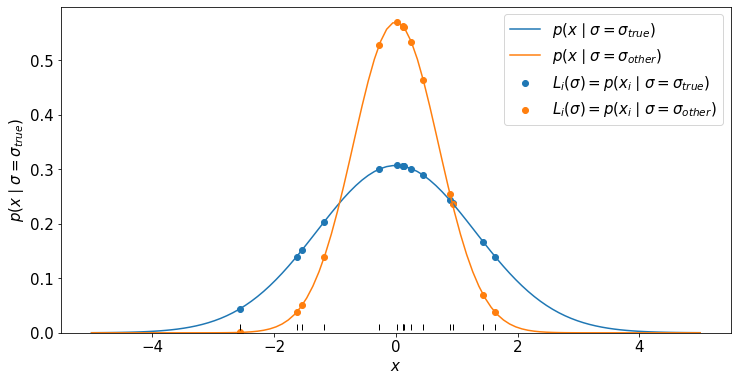

In [10]:
true_density = my_family_of_pdfs(x_for_plot,true_sigma)
plt.plot(x_for_plot, true_density, label=r'$p(x \mid \sigma=\sigma_{true})$')
plt.scatter(data, likelihood_i, label=r'$L_i(\sigma) = p(x_i \mid \sigma=\sigma_{true})$')

other_density = my_family_of_pdfs(x_for_plot,other_sigma)
plt.plot(x_for_plot, other_density, label=r'$p(x \mid \sigma=\sigma_{other})$')
plt.scatter(data, other_likelihood_i, label=r'$L_i(\sigma) = p(x_i \mid \sigma=\sigma_{other})$')

plt.ylim(0)
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x \mid \sigma=\sigma_{true}$)')
plt.plot(data, [0.01]*len(data), '|', color='k')
plt.legend();

We will then look at the reparametrized likelihood for the individual data points $p(x_i | V)$ and since the data are i.i.d. the total likelihood is $L^\prime(V) = \prod_i p^\prime(x_i | V)$. 

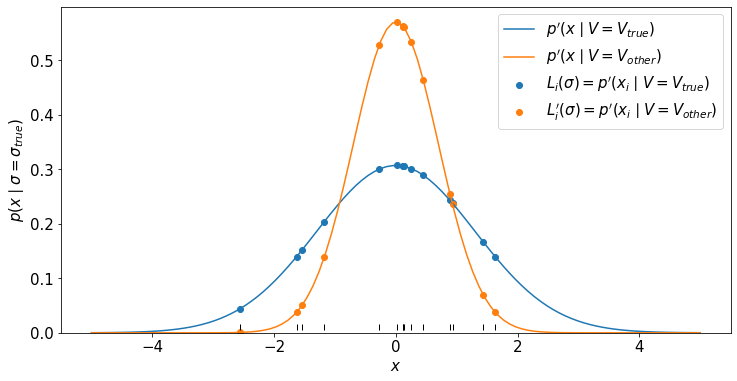

In [11]:
true_density = my_reparametrized_family_of_pdfs(x_for_plot,true_V)
plt.plot(x_for_plot, true_density, label=r'$p^\prime(x \mid V=V_{true})$')
plt.scatter(data, likelihood_i, label=r'$L_i(\sigma) = p^\prime(x_i \mid V=V_{true})$')

other_density = my_reparametrized_family_of_pdfs(x_for_plot,other_V)
plt.plot(x_for_plot, other_density, label=r'$p^\prime(x \mid V=V_{other})$')
plt.scatter(data, other_likelihood_i, label=r'$L_i^\prime(\sigma) = p^\prime(x_i \mid V=V_{other})$')

plt.ylim(0)
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x \mid \sigma=\sigma_{true}$)')
plt.plot(data, [0.01]*len(data), '|', color='k')
plt.legend();

### Evaluate the likelihoods

Since the data are i.i.d. the total likelihood is $L(\sigma) = \prod_i p(x_i | \sigma)$ and the total likelihood for the reparametrized family is $L^\prime(V) = \prod_i p^\prime(x_i | V)$. Let's make two helper functions.

We will then plot the original and reparametrized likelihoods and see that the value of the likelihood is invariant to reprametrization: eg.  $L(\sigma) = L^\prime(V(\sigma))$

In [12]:
def my_likelihood(data,sigma):
    L = 1.
    for x in data:
        L *= my_family_of_pdfs(x,sigma)
    return L

def my_reparametrized_likelihood(data,variance):
    L = 1.
    for x in data:
        L *= my_reparametrized_family_of_pdfs(x,variance)
    return L

Let's compare $L(\sigma_{true})$ and $L^\prime(V(\sigma_{true}))$

In [13]:
-2*np.log(my_likelihood(data,true_sigma)), -2*np.log(my_reparametrized_likelihood(data,true_V))

(47.12737234655253, 47.12737234655253)

Let's compare $L(\sigma_{other})$ and $L^\prime(V(\sigma_{other}))$

In [14]:
-2*np.log(my_likelihood(data,other_sigma)), -2*np.log(my_reparametrized_likelihood(data,other_V))

(57.1805758896008, 57.1805758896008)

They are equal!

### Make matched pairs for the parameters

Note, we are **not** using `np.linspace` twice, we are making pairs such that  `V_for_plot[i] = sigma_for_plot[i]**2`. This is important for understanding the last three plots. 

In [15]:
sigma_for_plot = np.linspace(.5,2.5)
V_for_plot = sigma_to_V(sigma_for_plot)
#V_for_plot = np.linspace(sigma_to_V(.5),sigma_to_V(2.5)) ## NOT THIS, it would make a line in the next plot

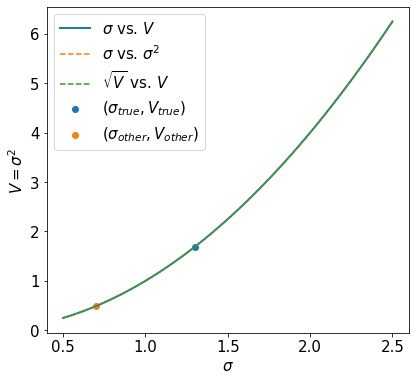

In [16]:
plt.plot(sigma_for_plot, V_for_plot, label=r'$\sigma$ vs. $V$', lw=2)
plt.plot(sigma_for_plot, sigma_for_plot**2, label=r'$\sigma$ vs. $\sigma^2$', ls='dashed')
plt.plot(np.sqrt(V_for_plot), V_for_plot, label=r'$\sqrt{V}$ vs. $V$', ls='dashed')
plt.scatter(true_sigma, true_V, label=r'$(\sigma_{true}, V_{true})$')
plt.scatter(other_sigma, other_V, label=r'$(\sigma_{other}, V_{other})$')
plt.gca().set_aspect(0.3)
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$V = \sigma^2$')
plt.legend();

Note that above these three curves  are identical.

| x-axis  | y-axis |
|:-----: | :-----: |
| `sigma_for_plot` | `V_for_plot` |
| `sigma_for_plot` | `sigma_for_plot**2` |
| `np.sqrt(V_for_plot)` | `V_for_plot` |

### Plot the likelihoods

First, evaluate the original and reparametrized likelihoods.

In [17]:
original_likelihood = my_likelihood(data, sigma_for_plot)

In [18]:
reparametrized_likelihood = my_reparametrized_likelihood(data, V_for_plot)

This is somewhat subtle. When we use `plt.plot(x,y)` it assumes that `x` and `y` are arrays and that `x[i]` and `y[i]` are paired. We took care to make this be the case. So we can mix and match the input and output. If the x-axis corresponds to the input, we are directly plotting the likeilhood as it was evaluated. However, if we mix the x-axis and the input then we are reparametrizing the likelihood via plotting not via evaluation.

First consider this pair of plots. The first row is the direct evaluation of the original likelihood $L(\sigma)$. The second row is the direct evaluation of the reparametrized likelihood $L^\prime(V)$, but plotted against $\sqrt{V}$. The fact that they match shows that the value of the likelihood is invariant to reparameterization.

| Input  | Output  | x-axis for plot|
|:-----: | :-----: | :-----: |
| `sigma_for_plot` | `original_likelihood` | `sigma_for_plot` |
| `V_for_plot`     | `reparametrized_likelihood` | `np.sqrt(V_for_plot)`|

Note the use of a secondary axis on the top of the plot.

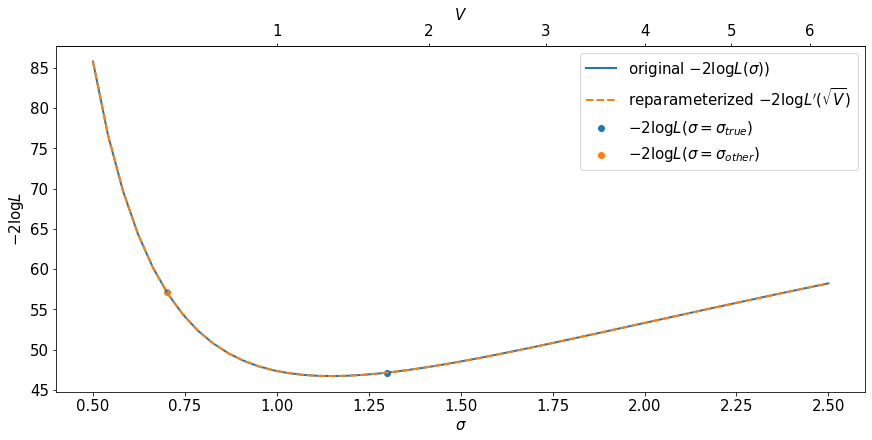

In [19]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(sigma_for_plot, -2.*np.log(original_likelihood), label=r'original $-2 \log L(\sigma))$', lw=2)
ax.plot(np.sqrt(V_for_plot), -2.*np.log(reparametrized_likelihood), label=r'reparameterized $-2 \log L^\prime(\sqrt{V})$', ls='dashed',lw=2)
plt.scatter(true_sigma, -2*np.log(my_likelihood(data,true_sigma)), label=r'$-2 \log L(\sigma=\sigma_{true}) $')
plt.scatter(other_sigma, -2*np.log(my_likelihood(data,other_sigma)), label=r'$-2 \log L(\sigma=\sigma_{other}) $')


ax.set_ylabel(r'$-2 \log L$')
ax.set_xlabel(r'$\sigma$')
ax.legend()
secax = ax.secondary_xaxis('top', functions=(sigma_to_V, V_to_sigma))
secax.set_xlabel(r'$V$');

The second plot is similar. The first row is the direct evaluation of the reparametrized likelihood $L^\prime(V)$. 
The second row is the direct evaluation of the original likelihood $L(\sigma)$, but plotted against $\sigma^2$. The fact that they match shows, again, that the value of the likelihood is invariant to reparameterization.



| Input  | Output  | x-axis for plot|
|:-----: | :-----: | :-----: |
| `sigma_for_plot` | `original_likelihood` | `sigma_for_plot**2`|
| `V_for_plot`     | `reparametrized_likelihood` | `V_for_plot` |

Note the use of a secondary axis on the top of the plot.

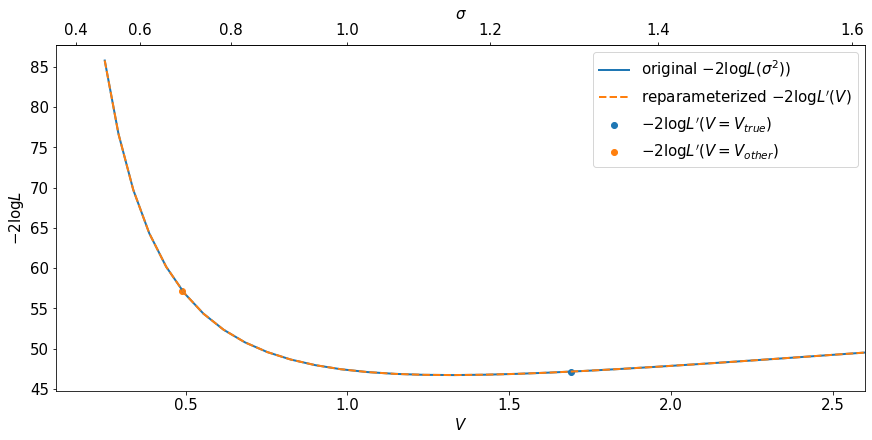

In [20]:
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(sigma_for_plot**2, -2.*np.log(original_likelihood), label=r'original $-2 \log L(\sigma^2))$', lw=2)
ax.plot(V_for_plot, -2.*np.log(reparametrized_likelihood), label=r'reparameterized $-2 \log L^\prime(V)$', ls='dashed',lw=2)
plt.scatter(true_V, -2*np.log(my_reparametrized_likelihood(data,true_V)), label=r'$-2 \log L^\prime(V=V_{true}) $')
plt.scatter(other_V, -2*np.log(my_reparametrized_likelihood(data,other_V)), label=r'$-2 \log L^\prime(V=V_{other}) $')
ax.set_ylabel(r'$-2 \log L$')
ax.set_xlabel(r'$V$')
ax.set_xlim(.1,2.6) #need to avoid some error with secondary axis with lower lim = 0
ax.legend()
secax = ax.secondary_xaxis('top', functions=(V_to_sigma,sigma_to_V))
secax.set_xlabel(r'$\sigma $');

## Equivariance of the MLE

```{tip}

The **maximum likelihood** value of the parameters transform **equivariantly**. 

Physicists often use the term *covariant* (or *contravariant*) in this context (eg. the way Lorentz vectors transform under a boost), but this term may be confused with the [covariance of two random variables](correlation).
```

For example, if 

$$
\hat{\sigma}_{MLE} := \textrm{argmin}_\sigma L(\sigma)
$$

and

$$
\hat{V}_{MLE} := \textrm{argmin}_V L^\prime(V)
$$

then 

$$
\hat{\sigma}_{MLE} = \sqrt{\hat{V}}_{MLE}
$$

and

$$
\hat{V}_{MLE} = \hat{\sigma}^2_{MLE}
$$

```{warning} 

Often people say that the maximum likelhood estimator is *invariant* to reparameterization, but this is sloppy language. Invariant would mean $\hat{\sigma} = \hat{V}$. Intuitively the point is that it doesn't matter which parameterization you use, you will get the same answer (and the transformation from $\sigma \to V$ is implied).

```

```{tip}

The equivariance condition can also be understood as the following commutative diagram representing $f(g·x) = g·f(x)$. Here $f$ would represent transforming from $\sigma \to V$ (eg. $X$ and $Y$ in the figure) and $g$ would represent finding the maximum likelihood for the parameter in question.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/06/Equivariant_commutative_diagram.png/1200px-Equivariant_commutative_diagram.png" alt="Equivariant commutative diagram.png" width="30%"><br><a href="http://creativecommons.org/licenses/by-sa/3.0/" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=34670">Link</a>

```

### Check explicitly

Let's check this explicitly using `scipy.optimize`

In [21]:
from scipy.optimize import minimize

In [37]:
def likelihood_wrapper(sigma):
    return -2*np.log(my_likelihood(data, sigma))

x0 = np.array([other_sigma])
result_from_orig = minimize(likelihood_wrapper, x0, method='nelder-mead',  options={'xatol': 1e-8, 'disp': True})
sigma_MLE = result_from_orig.x

Optimization terminated successfully.
         Current function value: 46.697141
         Iterations: 28
         Function evaluations: 56


In [48]:
def reparametrized_likelihood_wrapper(sigma):
    return -2*np.log(my_reparametrized_likelihood(data, sigma))

x0 = np.array([other_V])
result_from_rep = minimize(reparametrized_likelihood_wrapper, x0, method='nelder-mead',  options={'xatol': 1e-8, 'disp': True})
V_MLE = result_from_rep.x
likelihood_at_V_MLE = np.exp(-result_from_rep.fun/2.)

Optimization terminated successfully.
         Current function value: 46.697141
         Iterations: 31
         Function evaluations: 65


In [39]:
sigma_MLE, np.sqrt(V_MLE)

(array([1.14755414]), array([1.14755414]))

In [40]:
sigma_MLE**2, V_MLE

(array([1.31688049]), array([1.31688051]))

Fantastic!

## Comparison to maximum a posteriori (MAP) estimate

In a Bayesian analysis one would promote $\sigma$ to a random variable $\Sigma$ and also have a prior $p_\Sigma(\Sigma)$. 

From this one would calculate the posterior using Bayes' theorem 

$$
p_{\Sigma|X}(\Sigma | X=x) = \frac{p_{X|\Sigma}(X=x \mid \Sigma) p_\Sigma(\Sigma)}{p_X(X=x)}
$$

or more colloquially 

$$
p(\sigma | x) = \frac{p(x \mid \sigma) p(\Sigma)}{p(X)}
$$

From this Bayesian analysis often considers the [**maximum a posteriori**](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation#Limitations) point estimate, or MAP.

$$
\hat{\sigma}_{MAP} := \textrm{argmax}_\sigma p(\sigma|x)
$$

Note that if we change variables from $\sigma \to V$, then the posterior will transform in a way that includes the Jacobian factor $|\partial V / \partial \sigma| = 2 \sigma = 2 \sqrt{V}$. This same Jacobian factor also applies to the prior $p(\theta) \to p(V)$, which makes sense given that the likelihood and the normalizing constant are invariant under reparametrization. One can ask, what is the MAP estimate for $V$?

$$
\hat{V}_{MAP} := \textrm{argmax}_V p(V|x)
$$

```{warning} 

Unlike maximum likelihood estimators, the MAP estimate is not equivariant (covariant) to reparameterization. 

Switching from one parameterization to another involves introducing a Jacobian that impacts on the location of the maximum.
```
Therefore, 

$$
\hat{V}_{MAP}  \ne \hat{\sigma}_{MAP}^2
$$

and 

$$
\hat{\sigma}_{MAP}  \ne \sqrt{\hat{V}_{MAP} }
$$


## The myth of the uninformative uniform prior

A common logical fallacy is [Confusion of the inverse](https://en.wikipedia.org/wiki/Confusion_of_the_inverse). Here is a snippet from Wikipedia 

> Confusion of the inverse, also called the conditional probability fallacy or the inverse fallacy, is a logical fallacy whereupon a conditional probability is equated with its inverse; that is, given two events A and B, the probability of A happening given that B has happened is assumed to be about the same as the probability of B given A, when there is actually no evidence for this assumption. More formally, P(A|B) is assumed to be approximately equal to P(B|A).

This inverse fallacy is closely connected to the common tendency to think of the posterior and likelihood as being proportional $p(\theta|x) \propto p(x|\theta)$, which is the case if one were to place a uniform prior on $\theta$ (or implicitly setting $p(\theta)=1$ and not worrying about the normalization of the prior as long as the posterior is normalized appropriately). 

Putting a uniform prior on a parameter $\theta$ is deceptively attractive. Often people say that this is an uninformative prior because it assigns equal probability (density) to all values of $\theta$. 

```{warning} 

A uniform prior in $\theta$ is **not** uniform in a different parameterization $\phi$. 
```

As we saw in [*How do distributions transform under a change of variables?*](distributions/change-of-variables), the uniform distribution for the angle $x \in [0, 2\pi]$ was dramatically transformed when we changed variables to $\cos(x)$. Alternatively, any informative prior is uniform under the appropriate reparameterization. 

So if we:
 * place a uniform prior on $\theta$
 * compute the posterior $p(\theta|x) \propto p(x|\theta)$
 * change variables from $\theta \to \phi$, which results in $p(\phi|x) = p(\phi|x) / |\partial \phi / \partial \theta | \propto p(x|\phi) / |\partial \phi / \partial \theta$

We will not get the same results as if we:
 * place a uniform prior on $\phi$
 * compute the posterior $p^\prime(\phi | x) \propto p(x | \phi)$
 
```{tip}
This can also be thought of as **a violation of equivariance** in the following commutative diagram representing $f(g·x) = g·f(x)$. Here $f$ would represent would represent transforming from $\theta \to \phi$ (eg. $X$ and $Y$ in the diagram), and $g$ would be "derive a posterior by placing a uniform prior on the parameter in question".

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/06/Equivariant_commutative_diagram.png/1200px-Equivariant_commutative_diagram.png" alt="Equivariant commutative diagram.png" width="30%"><br><a href="http://creativecommons.org/licenses/by-sa/3.0/" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=34670">Link</a>
```


This is would not be the case if $\theta$ were discrete, and the change of variables from $\theta$ to $\phi$ was 1-to-1. In that case, the argument for a uniform prior being uninformative makes more sense. 


## Demonstration of likelihood vs. posterior under reparameterization

Let's assume a uniform prior for $\sigma \in [0.5, 2.5]$, so $p(\sigma) = \frac{1}{2}$.

This will imply a prior for $V \in [0.5^2, 2.5^2]$ that is $p(V) = \frac{1}{2}\frac{1}{2 \sqrt{V}}$

Let's plot the likelihood and posterior vs. $\sigma$ and $V$.

### Sampling the posterior

It's easy to make mistakes when predicting the transformed distribution, so let's check by drawing samples $\{\sigma_i\}$ from the posterior, transforming them directly with $V_i = \sigma_i^2$, and then histograming them. 

To do this we will use [the accept / reject algorithm](distributions/accept-reject) (aka [rejection sampling](prml_notebooks/ch11_Sampling_Methods.html#rejection-sampling) ).

In [26]:
N_accep_rej = 100000
s_accep_rej = np.random.uniform(0.5,2.5, N_accep_rej)
y_accep_rej = np.random.uniform(0, np.max(original_likelihood), N_accep_rej)
mask = y_accep_rej<np.interp(s_accep_rej, sigma_for_plot, original_likelihood)
sigma_posterior_samples = s_accep_rej[mask]

### Normalizing the posterior

With a uniform prior in $\sigma$, the posterior is proportional to the likelihood, but we still need to normalize (the denominator in Bayes' theorem). We will use `scipy.integrate`.

In [27]:
import scipy.integrate as integrate

In [28]:
(posterior_sigma_norm, uncertainty) = integrate.quad(lambda s: np.interp(s, sigma_for_plot, original_likelihood), 0.5, 2.5)
posterior_sigma_norm

4.048436794345585e-11

In [29]:
def posterior_in_sigma(sigma):
    return np.interp(sigma, sigma_for_plot, original_likelihood)/posterior_sigma_norm

def prior_in_sigma(sigma):
    return 1./(2.5-0.5)*np.ones(sigma.size)

### Make the plot for $\sigma$

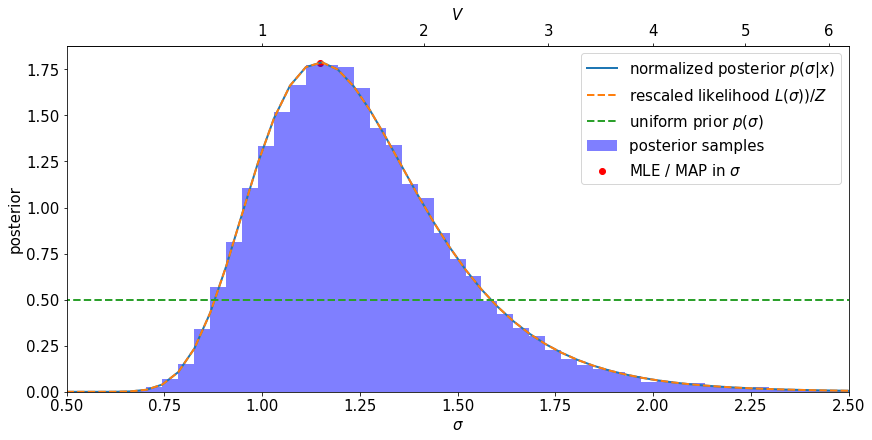

In [43]:
fig, ax = plt.subplots(constrained_layout=True)

ax.hist(sigma_posterior_samples, np.linspace(0.5, 2.5,50), density=True, alpha=0.5, color='blue', label='posterior samples')
ax.plot(sigma_for_plot, posterior_in_sigma(sigma_for_plot), label=r'normalized posterior $p(\sigma | x)$', lw=2)
ax.plot(np.sqrt(V_for_plot), (original_likelihood)/posterior_sigma_norm, label=r'rescaled likelihood $L(\sigma))/Z$', ls='dashed',lw=2)
ax.plot(V_for_plot, prior_in_sigma(sigma_for_plot), label=r'uniform prior $p(\sigma)$', ls='dashed',lw=2)
ax.scatter(sigma_MLE, posterior_in_sigma(sigma_MLE), c='r', label='MLE / MAP in $\sigma$')

ax.set_ylabel(r'posterior')
ax.set_xlabel(r'$\sigma$')
ax.set_ylim(0)
ax.set_xlim(0.5, 2.5)
ax.legend()
secax = ax.secondary_xaxis('top', functions=(sigma_to_V, V_to_sigma))
secax.set_xlabel(r'$V$');

Notice the following:
 * The prior **is**  uniform in $\sigma$ (is it uninformative?)
 * The posterior and the likelihood have the same shape -- they are proportional to each other. 
     * the MLE and MAP coincide
 * Our accept/reject samples agree with the posterior distribution

In [50]:
sigma_MAP = sigma_MLE

### Make the same plot for $V$

First we transforms the samples from the prior deterministically. This is the most robust and least error prone way to check. It's also most closely tied the definition of what it means to change variables. 

In [31]:
V_posterior_samples = sigma_to_V(sigma_posterior_samples)

Now we will use the result from our change of variables formula to predict the posterior and prior in $V$.

In [32]:
def posterior_in_V(V):
    sigma_ = V_to_sigma(V)
    jacobian = 2*sigma_ #doing it by hand
    return posterior_in_sigma(sigma_)/jacobian

def prior_in_V(V):
    sigma_ = V_to_sigma(V)
    jacobian = 2*sigma_ #doing it by hand
    uniform_prior_in_sigma = (1/(2.5-0.5))
    return uniform_prior_in_sigma/jacobian

Let's check that both the prior and posterior are normalized properly.

In [58]:
#check normalization for posterior in V, should be 1
(V_posterior_norm, V_uncertainty) = integrate.quad(lambda V: posterior_in_V(V), 0.5**2, 2.5**2)
print('norm of posterior is {0} +/- {1}'.format(V_posterior_norm, V_uncertainty))
#don't worry about warning here, integration is good enough to make the point

norm of posterior is 0.9997008924989026 +/- 7.28054934385769e-05


<ipython-input-58-0d96b2dc5a03>:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  (V_posterior_norm, V_uncertainty) = integrate.quad(lambda V: posterior_in_V(V), 0.5**2, 2.5**2)


In [34]:
#check normalization for prior in V, should be 1
(V_prior_norm, V_uncertainty) = integrate.quad(lambda V: prior_in_V(V), 0.5**2, 2.5**2)
V_prior_norm

1.0000000000000073

In [35]:
#calculate integral of likelihood in V, just for plotting purposes
(V_L_norm, uncertainty) = integrate.quad(lambda V: np.interp(V, V_for_plot, reparametrized_likelihood), 0.5**2, 2.5**2)
V_L_norm

1.0155480361220947e-10

let's find the MAP

In [53]:
x0 = np.array([other_V])
result_from_rep = minimize(lambda V: -posterior_in_V(V), x0, method='nelder-mead',  options={'xatol': 1e-8, 'disp': True})
V_MAP = result_from_rep.x
posterior_at_V_MAP = -result_from_rep.fun

Optimization terminated successfully.
         Current function value: -0.792190
         Iterations: 31
         Function evaluations: 62


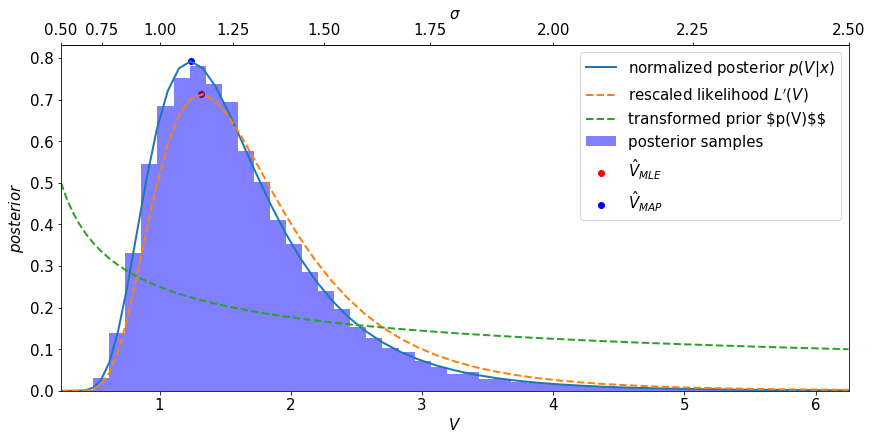

In [55]:
fig, ax = plt.subplots(constrained_layout=True)
ax.hist(V_posterior_samples, np.linspace(0.5**2, 2.5**2,50), density=True, alpha=0.5, color='blue', label='posterior samples')
ax.plot(V_for_plot, posterior_in_V(V_for_plot), label=r'normalized posterior $p(V| x)$', lw=2)
ax.plot(V_for_plot, (reparametrized_likelihood)/V_L_norm, label=r'rescaled likelihood $L^\prime(V)$', ls='dashed',lw=2)
ax.plot(V_for_plot, prior_in_V(V_for_plot), label=r'transformed prior $p(V)$$', ls='dashed',lw=2)
ax.scatter(V_MLE, likelihood_at_V_MLE/V_L_norm, c='r', label=r'$\hat{V}_{MLE}$')
ax.scatter(V_MAP, posterior_at_V_MAP, c='b', label=r'$\hat{V}_{MAP}$')

ax.set_ylabel(r'$posterior$')
ax.set_xlabel(r'$V$')
ax.set_xlim(.5**2,2.5**2) #need to avoid some error with secondary axis with lower lim = 0
ax.legend()
secax = ax.secondary_xaxis('top', functions=(V_to_sigma,sigma_to_V))
secax.set_xlabel(r'$\sigma $');

Check the MLE and the MAP for $V$.

In [59]:
V_MLE, V_MAP

(array([1.31688051]), array([1.23708871]))

### Violation of equivaraince for the MAP and posterior

Notice the following:
 * Remember, we know theand the MLE is equivariant and $\hat{\sigma}_{MLE}=\hat{\sigma}_{MAP}$, but 
    * $\hat{V}_{MLE} \ne \hat{V}_{MAP}$. Therefore the MAP is not equivariant
 * Remember, we know the likelihood is invariant, but the posterior and the likelihood are **no longer** proportional to each other anymore. 
     * Therefore we do not obtain the same posterior for $V$ if we apply a uniform prior in $V$.
     * The uniform prior in $\sigma$ **does not** correspond to a uniform prior $V$, thus it is not uninformative for $V$ even though this is just the resut of a reparameterization of the same likelihood, prior, and posterior. The converse also holds, a uniform prior in $V$ is not uninformative for $\sigma$. 
     
```{warning}
Think carefully before you put a uniform prior on whatever parameters are presented to you, and do not fool yourself into thinking a uniform prior is uninformative in some universal, parameterization-independent way. 
```

## Food for thought

```{admonition} Food for thought: Equipartion of energy
:class: tip

A key concept in statistical mechanics is the **equipartion of energy**, which assigns equal probability to states with the same energy. This is uniform distribution. If we are working with discrete states, then there is no ambiguity, but how do we understand equipartition of energy for continuous state spaces? In what variables is the system uniformly distributed?
```

```{admonition} Food for thought: Lorentz Invariant Phase space
:class: tip

In particle physics, the differential scattering cross-section is often factorized into the product of a squared-matrix element and a phase space term. This is like Fermi's golden rule that is a product of a transition rate( $\propto$ probability per unit time) and a density of states. It is also structurally similar to a product of a likelhood and a prior, where phase space plays the role of the prior. In what variables is the Lorentz invariant phase space uniform (and why)?
```